<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lab_8_Bag_of_Visual_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get Image

In [0]:
from skimage import data

In [4]:
img = data.camera()

img.shape, img

((512, 512), array([[156, 157, 160, ..., 152, 152, 152],
        [156, 157, 159, ..., 152, 152, 152],
        [158, 157, 156, ..., 152, 152, 152],
        ...,
        [121, 123, 126, ..., 121, 113, 111],
        [121, 123, 126, ..., 121, 113, 111],
        [121, 123, 126, ..., 121, 113, 111]], dtype=uint8))

## Show Image

In [0]:
import matplotlib.pyplot as plt

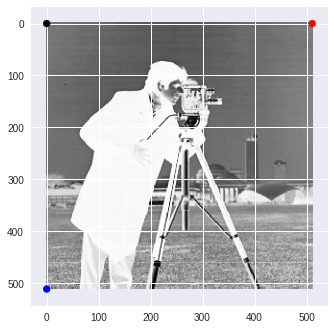

In [29]:
# plt.plot(img)
plt.imshow(img, interpolation='nearest')
plt.scatter(x=[0, 511, 0], y=[0, 0, 511], c=('black', 'r', 'b'))    # origin -> black, x-axis -> red, y-axis -> blue
plt.show()

In [0]:
from PIL import Image

In [0]:
image = Image.fromarray(img, 'L')
image.save('image.jpeg')

## Organize Directory

In [42]:
! mkdir dataset
# ! mkdir dataset/1
! ls

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/1’: File exists
dataset  image.jpeg  sample_data


In [0]:
# ! rm dataset/*.jpg

## Slicing Image into Chunks

In [0]:
# N_CHUNKS_PER_AXIS = 32
DIM_PATCH = (32, 32)

In [43]:
n_chunk_x = int(img.shape[0] / DIM_PATCH[0])
n_chunk_y = img.shape[1] // DIM_PATCH[1]
print(n_chunk_x, n_chunk_y, type(n_chunk_x))

for x_coord in range(n_chunk_x):
    for y_coord in range(n_chunk_y):
        patch_loc = (x_coord, y_coord, x_coord+DIM_PATCH[0], y_coord+DIM_PATCH[1])    # (left, top, right, down)
        
        patch = image.crop(box=patch_loc)
        patch.save('dataset/' + str(x_coord) + '_' + str(y_coord) + '.jpg')

32 32 <class 'int'>


## Slicing Numpy-Array into Chunks